In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as st
import time
from matplotlib import pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/capstone_project/project_progress/ML/ML_DEMONSTRATIONS/model_data_generated.h5') #load model

# Function

In [ ]:
def convert_json_dataframe(cpu_used):
  return pd.DataFrame(cpu_used)

In [ ]:
def last_append(data_awal,new_cpu_usage):
  data_awal.loc[len(data_awal)] = new_cpu_usage


In [ ]:
def train_scaler(data,mean=45.47328475262359,std=31.79330742742731):
  data=data.copy()
  data.cpu_usage=(data.cpu_usage-mean)/std
  return data

In [ ]:
def inverse_train_scaler(data,mean=45.47328475262359,std=31.79330742742731):
  data.cpu_usage=data.cpu_usage*std+mean


In [ ]:
def inverse_train_scaler_array(data,mean=45.47328475262359,std=31.79330742742731):
  return (data*std+mean).flatten()[0]


In [ ]:
def create_dataset(X,time_steps=1):
    Xs  = []
    for i in range(len(X) - time_steps+1):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
    return np.array(Xs)     

In [ ]:
def model_pred(model,data_2d,TIME_STEPS):
  return model.predict(data_2d.reshape(1,TIME_STEPS,1))

# Demonstration
- each 5 minutes new cpu usage uploaded

In [ ]:
cpu_used_forecast=[]  #array for save forecast data
TIME_STEPS=30


## Insert Entry Data

In [ ]:
cpu_used={'cpu_usage':np.random.normal(30,0.1,30)}    
cpu_use_df=convert_json_dataframe(cpu_used)  #original data, unchaged data
fore_cast_df=cpu_use_df.copy()   #data material for forecast

In [ ]:
#IF INPUT=3 THEN  CHECK ANOMALY BASED ON LAST 15 MINUTES


## Part 1

### Forecast 1 and Real Data 1




In [ ]:
scalling_data=train_scaler(cpu_use_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 1 
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 24ms/step


In [ ]:
#real data 1 occur
new_cpu_usage=81
last_append(cpu_use_df,new_cpu_usage)

In [ ]:
cpu_use_df

,cpu_usage
0,30.191544
1,29.914194
2,29.946606
3,29.892283
4,29.965615
5,29.880462
6,30.010858
7,29.946673
8,30.112607
9,30.054963


In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
fore_cast_df

,cpu_usage
0,30.191544
1,29.914194
2,29.946606
3,29.892283
4,29.965615
5,29.880462
6,30.010858
7,29.946673
8,30.112607
9,30.054963


### Forecast 2 & Real Data 2

In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 2
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 27ms/step


In [ ]:
cpu_used_forecast

[29.512362,
 30.057339,
 30.77922,
 31.59029,
 25.679602,
 28.43091,
 29.250309,
 30.575382,
 31.84665,
 29.481384,
 30.036348]

In [ ]:
#real data 2 occur
new_cpu_usage=80

last_append(cpu_use_df,new_cpu_usage)

In [ ]:
cpu_use_df

,cpu_usage
0,30.191544
1,29.914194
2,29.946606
3,29.892283
4,29.965615
5,29.880462
6,30.010858
7,29.946673
8,30.112607
9,30.054963


In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
fore_cast_df

,cpu_usage
0,30.191544
1,29.914194
2,29.946606
3,29.892283
4,29.965615
5,29.880462
6,30.010858
7,29.946673
8,30.112607
9,30.054963


### Forecast 3 and Real Data 3

In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 3
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 29ms/step


In [ ]:
cpu_used_forecast

[29.512362,
 30.057339,
 30.77922,
 31.59029,
 25.679602,
 28.43091,
 29.250309,
 30.575382,
 31.84665,
 29.481384,
 30.036348,
 30.764006]

In [ ]:
#real data 3 occur
new_cpu_usage=87

last_append(cpu_use_df,new_cpu_usage)

In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
fore_cast_df

,cpu_usage
0,30.191544
1,29.914194
2,29.946606
3,29.892283
4,29.965615
5,29.880462
6,30.010858
7,29.946673
8,30.112607
9,30.054963


In [ ]:
cpu_use_df

,cpu_usage
0,30.191544
1,29.914194
2,29.946606
3,29.892283
4,29.965615
5,29.880462
6,30.010858
7,29.946673
8,30.112607
9,30.054963


### Anomaly Determine

In [ ]:
average_actual_data=cpu_use_df.tail(3).cpu_usage.values.mean()
average_forecast_data=np.array(cpu_used_forecast[-3:]).mean()

In [ ]:
average_actual_data

82.66666666666667

In [ ]:
average_forecast_data

30.093912

In [ ]:
average_actual_data-average_forecast_data

52.57275454203288

In [ ]:
threshold=40

if (average_actual_data-average_forecast_data)>threshold:
  print('anomaly') 

anomaly


In [ ]:
#model too sensitive to high value

In [ ]:
#

In [ ]:
cpu_use_df

,cpu_usage
0,30.191544
1,29.914194
2,29.946606
3,29.892283
4,29.965615
5,29.880462
6,30.010858
7,29.946673
8,30.112607
9,30.054963


Text(0, 0.5, 'cpu usage')

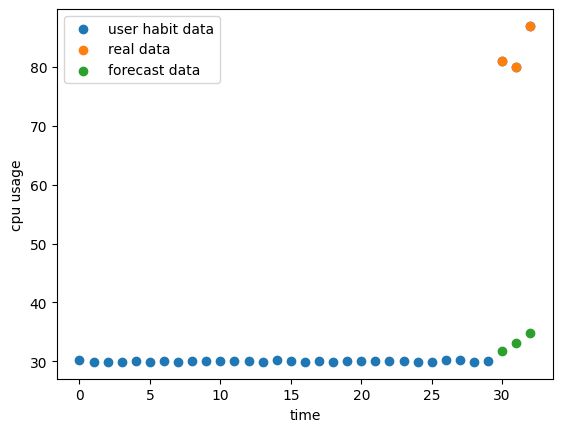

In [ ]:
plt.scatter(cpu_use_df.index,cpu_use_df.cpu_usage,label='user habit data')
plt.scatter(cpu_use_df.tail(3).index,cpu_use_df.tail(3).cpu_usage,label='real data')

plt.scatter(fore_cast_df.tail(3).index,fore_cast_df.tail(3).cpu_usage,label='forecast data')
plt.legend()
plt.xlabel('time')
plt.ylabel('cpu usage')

In [ ]:
fore_cast_df

## Part 2

### Forecast 1 and Real Data 1




In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 1 
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 46ms/step


In [ ]:
cpu_used_forecast

[29.512362, 30.057339, 30.77922, 31.59029]

In [ ]:
#real data 1 occur
new_cpu_usage=20
last_append(cpu_use_df,new_cpu_usage)

In [ ]:
cpu_use_df

,cpu_usage
0,29.956388
1,30.012249
2,29.938560
3,30.144947
4,30.037395
5,30.142154
6,30.067900
7,29.933809
8,29.946312
9,29.947098


In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
fore_cast_df

,cpu_usage
0,29.956388
1,30.012249
2,29.938560
3,30.144947
4,30.037395
5,30.142154
6,30.067900
7,29.933809
8,29.946312
9,29.947098


### Forecast 2 & Real Data 2

In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 2
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 50ms/step


In [ ]:
cpu_used_forecast

[29.512362, 30.057339, 30.77922, 31.59029, 25.679602]

In [ ]:
#real data 2 occur
new_cpu_usage=35

last_append(cpu_use_df,new_cpu_usage)

In [ ]:
cpu_use_df

,cpu_usage
0,29.956388
1,30.012249
2,29.938560
3,30.144947
4,30.037395
5,30.142154
6,30.067900
7,29.933809
8,29.946312
9,29.947098


In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
fore_cast_df

,cpu_usage
0,29.956388
1,30.012249
2,29.938560
3,30.144947
4,30.037395
5,30.142154
6,30.067900
7,29.933809
8,29.946312
9,29.947098


### Forecast 3 and Real Data 3

In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 3
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 42ms/step


In [ ]:
cpu_used_forecast

[29.512362, 30.057339, 30.77922, 31.59029, 25.679602, 28.43091]

In [ ]:
#real data 3 occur
new_cpu_usage=30

last_append(cpu_use_df,new_cpu_usage)

In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)
last_append(fore_cast_df,forecast_material)

In [ ]:
cpu_use_df

,cpu_usage
0,29.956388
1,30.012249
2,29.938560
3,30.144947
4,30.037395
5,30.142154
6,30.067900
7,29.933809
8,29.946312
9,29.947098


In [ ]:
fore_cast_df

,cpu_usage
0,29.956388
1,30.012249
2,29.938560
3,30.144947
4,30.037395
5,30.142154
6,30.067900
7,29.933809
8,29.946312
9,29.947098


### Anomaly Determine

In [ ]:
cpu_use_df.tail(3)

,cpu_usage
33,20.0
34,35.0
35,30.0


In [ ]:
cpu_used_forecast

[29.512362, 30.057339, 30.77922, 31.59029, 25.679602, 28.43091]

In [ ]:
cpu_used_forecast[-3:]

[31.59029, 25.679602, 28.43091]

In [ ]:
average_actual_data=cpu_use_df.tail(3).cpu_usage.values.mean()
average_forecast_data=np.array(cpu_used_forecast[-3:]).mean()

In [ ]:
average_actual_data

28.333333333333332

In [ ]:
average_forecast_data

28.566933

In [ ]:
average_actual_data-average_forecast_data

-0.2335993448893241

In [ ]:
threshold=40

if (average_actual_data-average_forecast_data)>threshold:
  print('anomaly') 

## Part 3

### Forecast 1 and Real Data 1




In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 1 
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 26ms/step


In [ ]:
cpu_used_forecast

[29.536327, 30.065193, 30.779324, 31.586014, 25.677797, 28.426512, 28.890171]

In [ ]:
#real data 1 occur
new_cpu_usage=10
last_append(cpu_use_df,new_cpu_usage)

In [ ]:
cpu_use_df

,cpu_usage
0,30.248129
1,29.901443
2,29.969535
3,29.842521
4,29.897057
5,29.881661
6,29.853113
7,30.002102
8,30.036999
9,30.108712


In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
fore_cast_df

,cpu_usage
0,30.248129
1,29.901443
2,29.969535
3,29.842521
4,29.897057
5,29.881661
6,29.853113
7,30.002102
8,30.036999
9,30.108712


### Forecast 2 & Real Data 2

In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 2
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 26ms/step


In [ ]:
cpu_used_forecast

[29.536327,
 30.065193,
 30.779324,
 31.586014,
 25.677797,
 28.426512,
 28.890171,
 19.593363]

In [ ]:
#real data 2 occur
new_cpu_usage=15

last_append(cpu_use_df,new_cpu_usage)

In [ ]:
cpu_use_df

,cpu_usage
0,30.248129
1,29.901443
2,29.969535
3,29.842521
4,29.897057
5,29.881661
6,29.853113
7,30.002102
8,30.036999
9,30.108712


In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
fore_cast_df

,cpu_usage
0,30.248129
1,29.901443
2,29.969535
3,29.842521
4,29.897057
5,29.881661
6,29.853113
7,30.002102
8,30.036999
9,30.108712


### Forecast 3 and Real Data 3

In [ ]:
scalling_data=train_scaler(fore_cast_df)
cpu_use_array=create_dataset(scalling_data,TIME_STEPS)

In [ ]:
#forecast 3
cpu_used_forecast.append(inverse_train_scaler_array(model_pred(model,cpu_use_array[-1],TIME_STEPS)))

1/1 [==============================] - 0s 25ms/step


In [ ]:
cpu_used_forecast

[29.536327,
 30.065193,
 30.779324,
 31.586014,
 25.677797,
 28.426512,
 28.890171,
 19.593363,
 17.915737]

In [ ]:
#real data 3 occur
new_cpu_usage=30

last_append(cpu_use_df,new_cpu_usage)

In [ ]:
#determine if new data should be input to be forecasting or not
average_real_cpu_usage=cpu_use_df.cpu_usage.mean()
forecast_material=min(new_cpu_usage,average_real_cpu_usage)

last_append(fore_cast_df,forecast_material)

In [ ]:
cpu_use_df

,cpu_usage
0,30.248129
1,29.901443
2,29.969535
3,29.842521
4,29.897057
5,29.881661
6,29.853113
7,30.002102
8,30.036999
9,30.108712


In [ ]:
fore_cast_df

,cpu_usage
0,30.248129
1,29.901443
2,29.969535
3,29.842521
4,29.897057
5,29.881661
6,29.853113
7,30.002102
8,30.036999
9,30.108712


### Anomaly Determine

In [ ]:
cpu_use_df.tail(3)

,cpu_usage
36,10.0
37,15.0
38,30.0


In [ ]:
cpu_used_forecast

[29.536327,
 30.065193,
 30.779324,
 31.586014,
 25.677797,
 28.426512,
 28.890171,
 19.593363,
 17.915737]

In [ ]:
cpu_used_forecast[-3:]

[28.890171, 19.593363, 17.915737]

In [ ]:
average_actual_data=cpu_use_df.tail(3).cpu_usage.values.mean()
average_forecast_data=np.array(cpu_used_forecast[-3:]).mean()

In [ ]:
average_actual_data

18.333333333333332

In [ ]:
average_forecast_data

22.133093

In [ ]:
average_actual_data-average_forecast_data

-3.7997595469156913

In [ ]:
threshold=40

if (average_actual_data-average_forecast_data)>threshold:
  print('anomaly') 